# Multi-Label Classification

In [32]:
from fastai.vision.all import *

In [33]:
path = untar_data(URLs.PASCAL_2007)

In [34]:
Path.BASE_PATH = path

In [35]:
path.ls()

(#8) [Path('train'),Path('test.json'),Path('segmentation'),Path('train.json'),Path('valid.json'),Path('test.csv'),Path('train.csv'),Path('test')]

In [36]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [37]:
def get_x(df):
    return path/'train'/df['fname']

def get_y(df):
    return df.labels.split()

def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train, valid

In [38]:
pascal = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=splitter,
    item_tfms = RandomResizedCrop(128, min_scale=0.35))

dls = pascal.dataloaders(df)

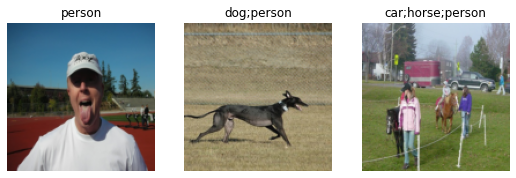

In [39]:
dls.show_batch(nrows=1, ncols=3)

## FIXME: If I define loss_func as nn.BCEWithLogitsLoss() the loss and plot differ.

In [40]:
learn = vision_learner(dls, resnet50, loss_func=nn.BCEWithLogitsLoss())
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=3)

epoch,train_loss,valid_loss,time
0,0.931683,0.692230,00:08
1,0.778075,0.454260,00:08
2,0.490552,0.136933,00:08


epoch,train_loss,valid_loss,time
0,0.152629,0.122477,00:10
1,0.127888,0.108038,00:10
2,0.105602,0.103869,00:10


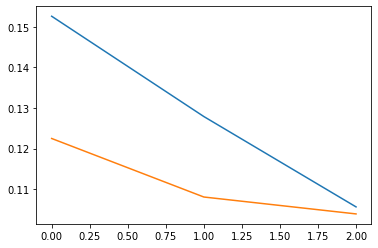

In [41]:
plt.plot(L(learn.recorder.values).itemgot(0))
plt.plot(L(learn.recorder.values).itemgot(1))

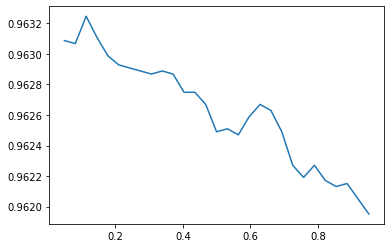

In [42]:
pred, targ = learn.get_preds()
x = torch.linspace(0.05, 0.95, 29)
y = [accuracy_multi(pred, targ, thresh=i, sigmoid=False) for i in x]
plt.plot(x, y)

In [43]:
learn = vision_learner(dls, resnet50)
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=3)

epoch,train_loss,valid_loss,time
0,0.932121,0.690381,00:08
1,0.776549,0.472894,00:08
2,0.491320,0.139073,00:08


epoch,train_loss,valid_loss,time
0,0.156534,0.125219,00:10
1,0.130677,0.110365,00:10
2,0.107539,0.104337,00:10


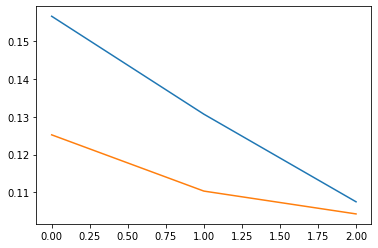

In [44]:
plt.plot(L(learn.recorder.values).itemgot(0))
plt.plot(L(learn.recorder.values).itemgot(1))

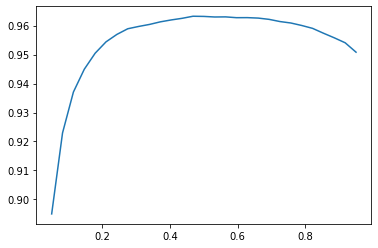

In [45]:
pred, targ = learn.get_preds()
x = torch.linspace(0.05, 0.95, 29)
y = [accuracy_multi(pred, targ, thresh=i, sigmoid=False) for i in x]
plt.plot(x, y)

In [46]:
learn.loss_func

FlattenedLoss of BCEWithLogitsLoss()